# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [87]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 81
['veraval', 'invercargill', 'broome', 'marka', 'kapuskasing', 'tiksi', 'tazovsky', 'constantia', 'colac', 'margaret river', 'ust-nera', 'preobrazheniye', 'san antonio del estrecho', 'avarua', 'laurel', 'ixtapa', 'saipan', 'bath', 'port-aux-francais', 'kodiak', 'grytviken', 'paso robles', 'mamuju', 'bethel', 'tura', "arkhangel'sk", 'keetmanshoop', 'puerto natales', 'taulaga', 'thinadhoo', 'petropavlovsk-kamchatsky', 'malinyi', 'puerto ayora', 'waitangi', 'stanley', 'talnakh', 'iqaluit', 'haiku-pauwela', 'codrington', 'kirakira', 'ocean shores', 'olonkinbyen', 'west island', 'taytay', 'port elizabeth', 'nemuro', 'remire-montjoly', 'adamstown', 'betio village', 'blackmans bay', 'papatowai', 'qaqortoq', 'udachny', 'villa dolores', 'ushuaia', 'nelson bay', 'junction city', 'nova sintra', 'port macquarie', 'sogndal', 'praia', 'lerwick', 'sitka', 'bamboo flat', 'edinburgh of the seven seas', 'luderitz', 'pyapon', 'grand-bassam', 'puerto baquerizo moreno', 'bar

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [88]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&APPID=" + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = (city_weather['main']['temp_max'] - 273.15) # temp needs to be converted from kelvins to Celcius
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | veraval
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | marka
Processing Record 5 of Set 1 | kapuskasing
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | tazovsky
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | colac
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | preobrazheniye
Processing Record 13 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | laurel
Processing Record 16 of Set 1 | ixtapa
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | bath
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | paso ro

In [89]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          80
Lat           80
Lng           80
Max Temp      80
Humidity      80
Cloudiness    80
Wind Speed    80
Country       80
Date          80
dtype: int64

In [90]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,veraval,20.9000,70.3667,21.05,29,0,3.84,IN,1738023539
1,invercargill,-46.4000,168.3500,21.68,43,68,4.47,NZ,1738023541
2,broome,42.2506,-75.8330,0.66,42,0,6.69,US,1738023542
3,marka,1.7159,44.7717,23.89,81,43,7.25,SO,1738023543
4,kapuskasing,49.4169,-82.4331,-16.95,71,40,8.75,CA,1738023544


In [91]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [92]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,veraval,20.9000,70.3667,21.05,29,0,3.84,IN,1738023539
1,invercargill,-46.4000,168.3500,21.68,43,68,4.47,NZ,1738023541
2,broome,42.2506,-75.8330,0.66,42,0,6.69,US,1738023542
3,marka,1.7159,44.7717,23.89,81,43,7.25,SO,1738023543
4,kapuskasing,49.4169,-82.4331,-16.95,71,40,8.75,CA,1738023544


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

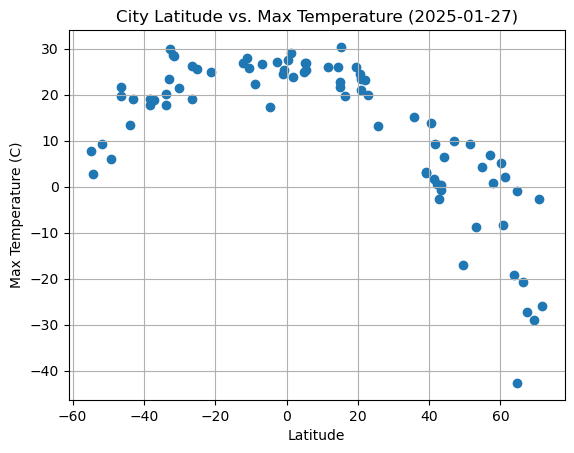

In [93]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Max Temperature (2025-01-27)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

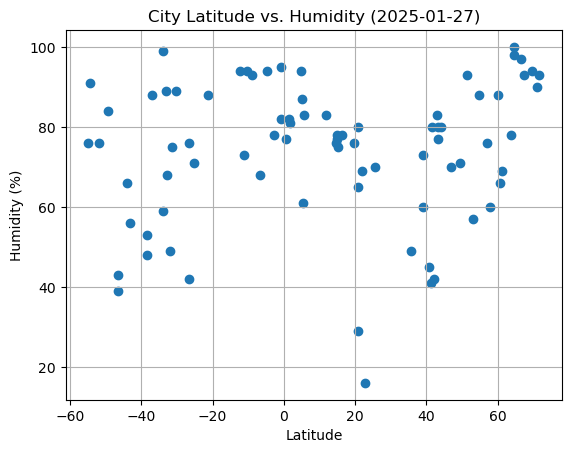

In [94]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Humidity (2025-01-27)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

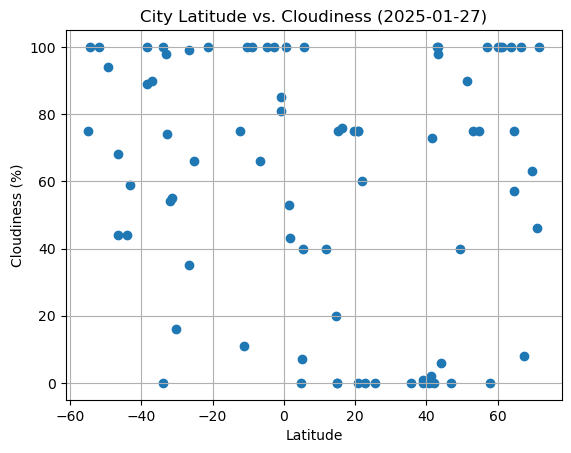

In [95]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Cloudiness (2025-01-27)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

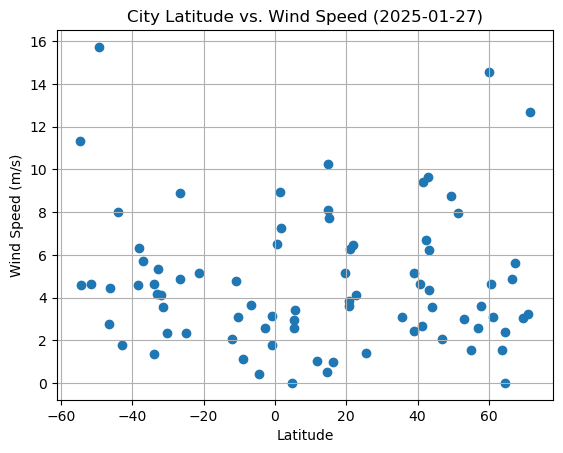

In [96]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Wind Speed (2025-01-27)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [97]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x,y):
    # Linear regression on x and y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = np.array(x) * slope + intercept

    # Build scatter plot for x vs. y
    plt.scatter(x,y)
    # Plot linear regression line
    plt.plot(x,regress_value,"r-",label = f"y = {round(slope,2)}x + {round(intercept,2)}")
    # Incorporate the other graph properties
    plt.grid()
    plt.legend()
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(f"{x.name} vs. {y.name}")
    print(f"The r^2 value is: {rvalue**2}")
    plt.show()


In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,veraval,20.9000,70.3667,21.05,29,0,3.84,IN,1738023539
2,broome,42.2506,-75.8330,0.66,42,0,6.69,US,1738023542
3,marka,1.7159,44.7717,23.89,81,43,7.25,SO,1738023543
4,kapuskasing,49.4169,-82.4331,-16.95,71,40,8.75,CA,1738023544
5,tiksi,71.6872,128.8694,-25.85,93,100,12.67,RU,1738023545


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,21.68,43,68,4.47,NZ,1738023541
8,colac,-38.3333,143.5833,17.69,53,100,4.58,AU,1738023549
9,margaret river,-33.9500,115.0667,17.71,59,0,4.62,AU,1738023550
12,avarua,-21.2078,-159.7750,25.03,88,100,5.14,CK,1738023555
17,port-aux-francais,-49.3500,70.2167,5.97,84,94,15.74,TF,1738023561


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7636068114570784


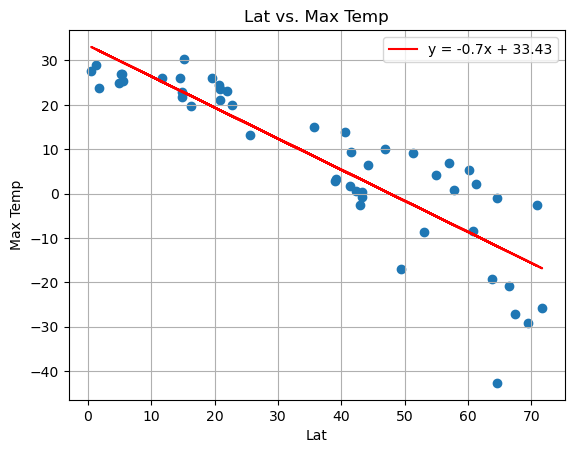

In [101]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

The r^2 value is: 0.45051607717022185


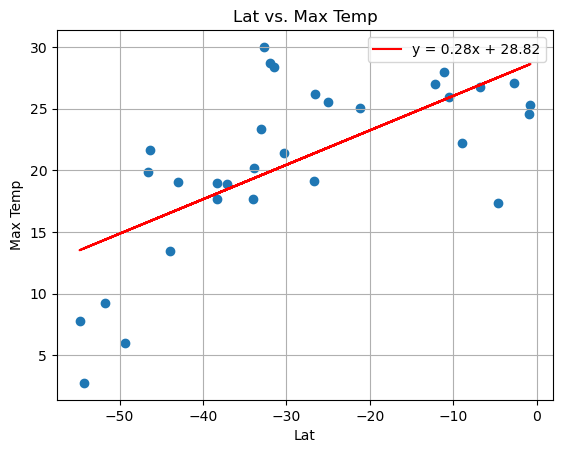

In [102]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.04187301296032494


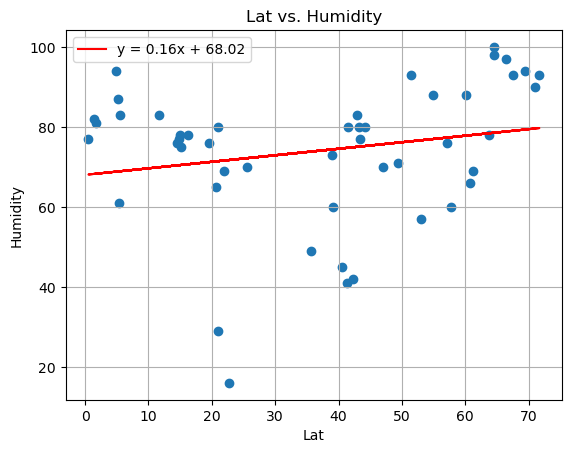

In [103]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r^2 value is: 0.14823888683136974


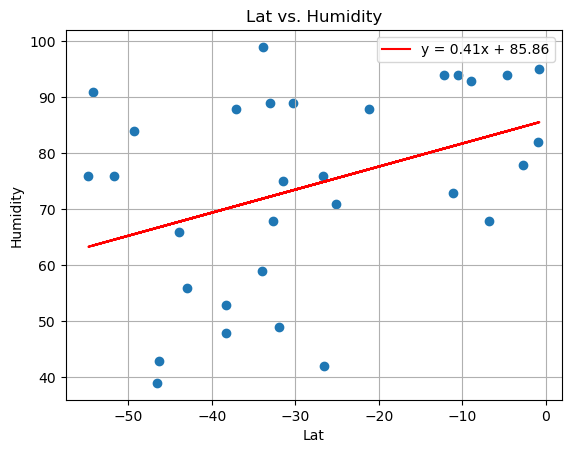

In [104]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.06976347346332268


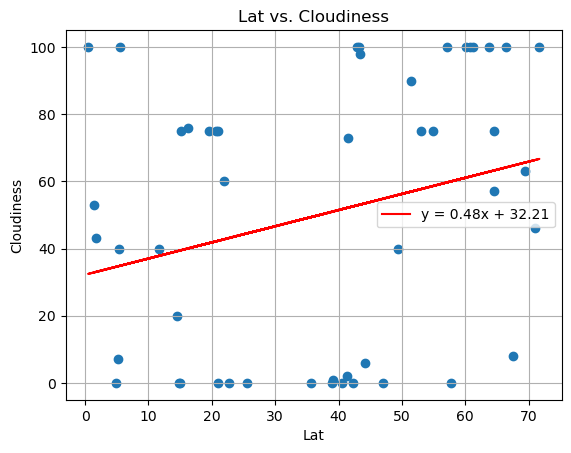

In [105]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

The r^2 value is: 0.0056621181311235


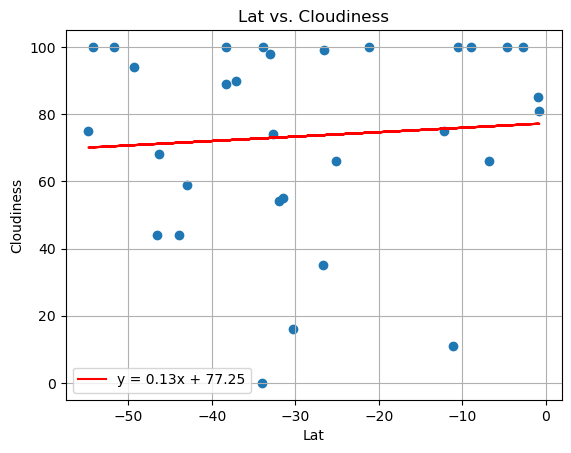

In [106]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.0010579437392280943


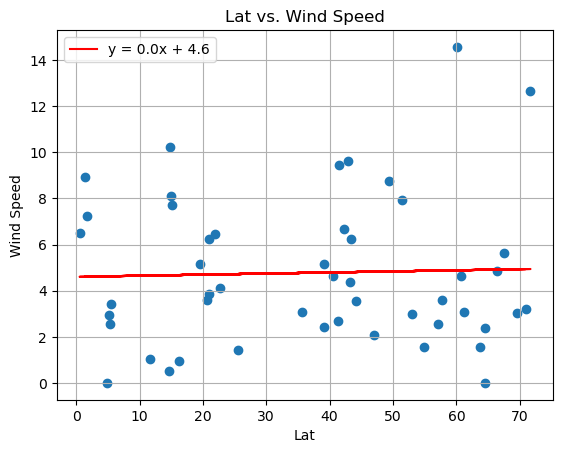

In [107]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

The r^2 value is: 0.26703752588697355


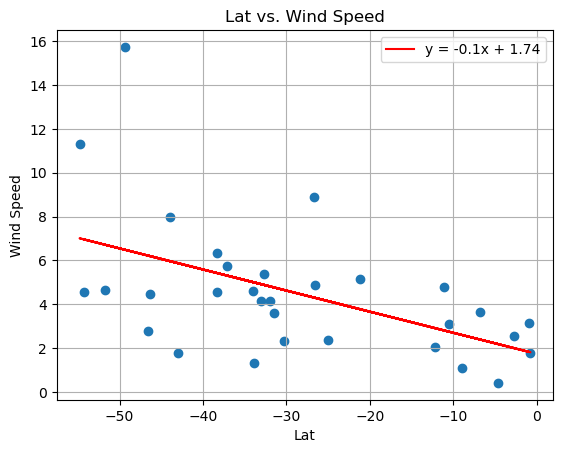

In [108]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE